<a href="https://colab.research.google.com/github/rammeshulam/ml-exercise/blob/main/clustering_basics_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Basics
Useful links:
* [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [Principal component analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import Image, HTML, display


# Exercise 1
## Create a dummy dataset

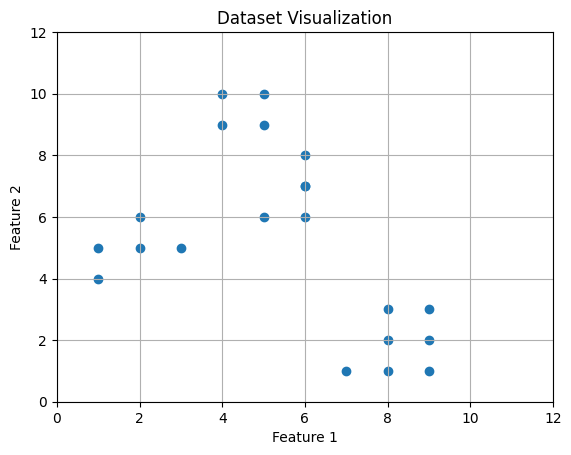

In [2]:
# Creating the dataset
x1 = np.array([3, 1, 2, 2, 1, 6, 6, 6, 5, 6,
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 5])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7,
               1, 1, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.scatter(x1, x2, marker='o')
plt.xlim([0, 12])
plt.ylim([0, 12])
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

## 1.1 Use K-Means to cluster the data into two clusters
* Apply K-Means algorithm
* Print
 * centroids,
 * the cluster id which the algorithm assigned for each data point, and
 * WCSS value (a.k.a. inertia)

In [3]:
kmeans = KMeans(n_clusters = 2, max_iter = 100).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
inertia = kmeans.inertia_
print(f"Centroids: {centroids}")
print(f'assigned segments: {labels}')
print(f'WCSS is: {inertia}')

Centroids: [[4.         6.92857143]
 [8.28571429 1.85714286]]
assigned segments: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0]
WCSS is: 105.21428571428572


In [4]:
pd.DataFrame({'Feature 1':X[:,0], 'Feature 2':X[:,1],'Cluster ID':kmeans.labels_}).sort_values(by = ['Cluster ID', 'Feature 1', 'Feature 2']).set_index('Cluster ID')

,Feature 1,Feature 2
Cluster ID,,
0,1,4
0,1,5
0,2,5
0,2,6
0,3,5
0,4,9
0,4,10
0,5,6
0,5,9


## 1.2 Choosing K

### 1.2.1 Elbow method:
* Run K-Means with different K values, starting from k=1
* Plot a graph which shows WCSS (inertia) values as a function of K (hint: use [plt.plot(x,y)](https://matplotlib.org/stable/tutorials/pyplot.html))
* According to the Elbow Method, what should be the best K for this dataset?

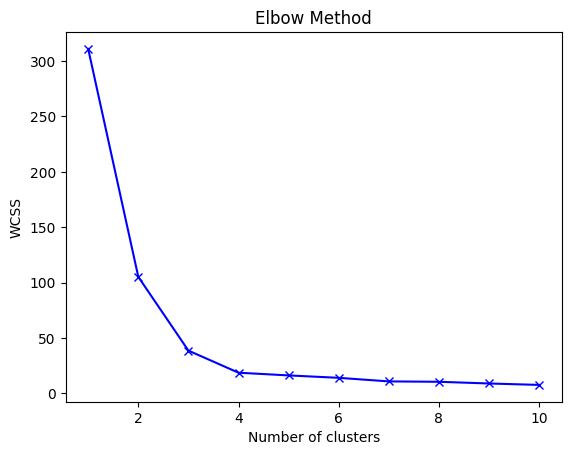

In [5]:
wcss = []
r = range(1,11)
for i in r:
    kmeans = KMeans(n_clusters = i, max_iter = 100).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(r, wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 1.2.2 Silhouette score
* Run K-Means with different K values, starting from **k=2**
* Plot a graph which shows Silhouette scores as a function of K
* According to the Silhouette score, what should be the best K for this dataset?

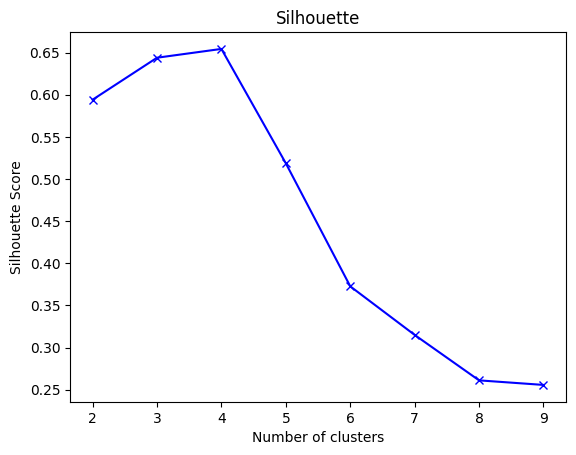

In [6]:
r = range(2,10)
sil_scores = []
for k in r:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  y_kmeans = kmeans.fit_predict(X)

  sil_score = silhouette_score(X, y_kmeans, metric = 'euclidean')
  sil_scores.append(sil_score)

plt.plot(r, sil_scores, 'bx-')
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#

## 1.3 Clusters visualization
* Use the _plot_clusters()_ function below to plot clustering assignment for k=1,2,3,4 (4 separate plots)

In [7]:
def plot_clusters(X, y_kmeans, cluster_centers):
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={len(cluster_centers)})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

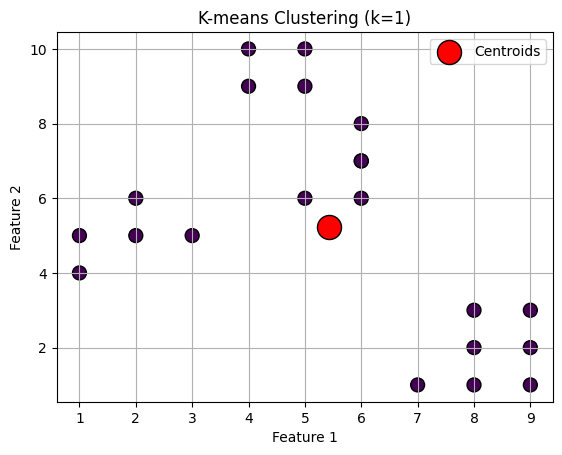

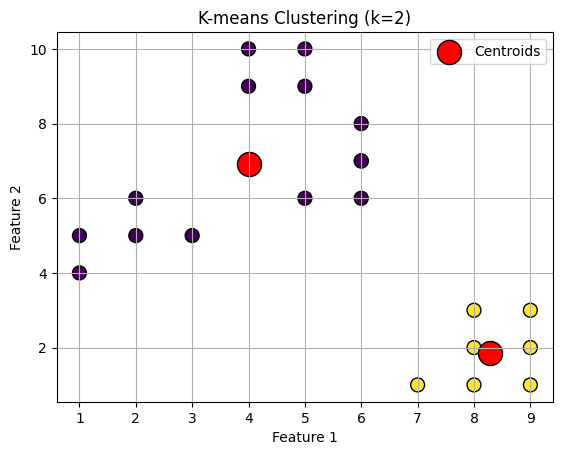

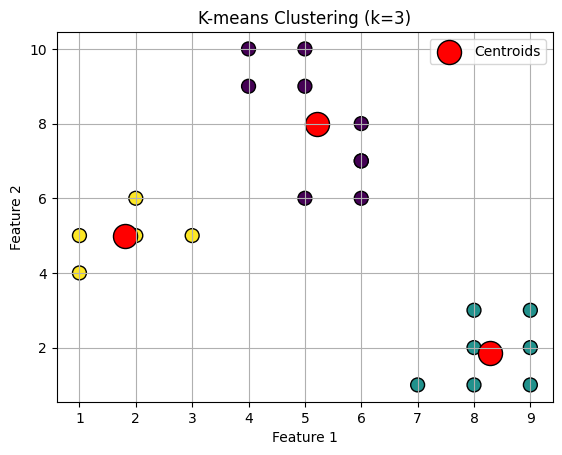

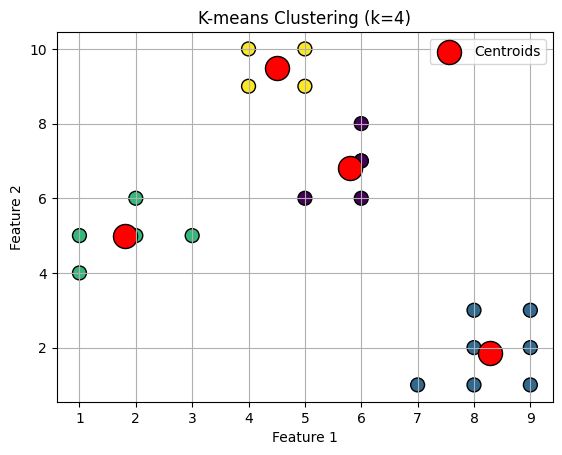

In [8]:
# Initialize a range of k values
k_range = range(1, 5)

# Fit and plot data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    plot_clusters(X, y_kmeans, kmeans.cluster_centers_)

# Exercise 2 - Clustering Soccer players

## 2.0 Learn the domain & load raw data
* Visit [link text](https://sofifa.com/), choose a player and review statistics
* [Sofifa-web-scraper](https://github.com/prashantghimire/sofifa-web-scraper/tree/main), gives access to the data.
* Your goal is to cluster the players into meaningful clusters, using the features in '*df_columns*' below
* Load the data into a dataframe and review it. Name it *df_full*
* create a dataframe with subset of columns *df_columns*. Name it *df*


In [9]:
df_columns = ["crossing","finishing","heading_accuracy","short_passing","volleys","dribbling","curve","fk_accuracy","long_passing","ball_control","acceleration","sprint_speed","agility","reactions","balance","shot_power","jumping","stamina","strength","long_shots","aggression","interceptions","positioning","vision","penalties","composure","defensive_awareness","standing_tackle","sliding_tackle","gk_diving","gk_handling","gk_kicking"]
df_columns

['crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defensive_awareness',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking']

In [10]:
data_url = 'https://github.com/prashantghimire/sofifa-web-scraper/blob/main/output/player-data-full.csv?raw=true'
df_full = pd.read_csv(data_url)
df_full

<ipython-input-10-4228e1aa7608>:2: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(data_url)


,player_id,version,name,full_name,description,image,height_cm,weight_kg,dob,positions,...,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,play_styles
0,239085,2024-07-08,Erling Haaland,Erling Braut Haaland,"Erling Haaland (Erling Braut Haaland, born 21 ...",https://cdn.sofifa.net/players/239/085/24_120.png,195,94,2000-07-21,ST,...,87,38,47,29,7,14,13,11,7.0,"Acrobatic +,Power Header,Quick Step"
1,231747,2024-07-08,Kylian Mbappé,Kylian Mbappé Lottin,"Kylian Mbappé (Kylian Mbappé Lottin, born 20 D...",https://cdn.sofifa.net/players/231/747/24_120.png,182,75,1998-12-20,"ST,LW",...,88,26,34,32,13,5,7,11,6.0,"Quick Step +,Finesse Shot,Rapid,Flair,Trivela,..."
2,192985,2024-07-08,Kevin De Bruyne,Kevin De Bruyne,Kevin De Bruyne (born 28 June 1991) is a Belgi...,https://cdn.sofifa.net/players/192/985/24_120.png,181,75,1991-06-28,"CM,CAM",...,88,66,70,53,15,13,5,10,13.0,"Incisive Pass +,Dead Ball,Pinged Pass,Long Bal..."
3,231866,2024-07-08,Rodri,Rodrigo Hernández Cascante,Rodri (born 22 June 1996) is a Spanish footbal...,https://cdn.sofifa.net/players/231/866/24_120.png,191,82,1996-06-22,"CDM,CM",...,90,92,87,78,10,10,7,14,8.0,"Power Shot +,Long Ball Pass,Bruiser,Aerial,Lon..."
4,202126,2024-07-08,Harry Kane,Harry Kane,Harry Kane (born 28 July 1993) is a British fo...,https://cdn.sofifa.net/players/202/126/24_120.png,188,85,1993-07-28,ST,...,92,46,46,38,8,10,11,14,11.0,"Incisive Pass +,Long Ball Pass,First Touch,Tri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18721,277344,2024-07-08,Éanna Fitzgerald,Eanna Fitzgerald,"Éanna Fitzgerald (Eanna Fitzgerald, born 20 Fe...",https://cdn.sofifa.net/players/277/344/24_120.png,185,75,2005-02-20,CM,...,45,38,39,46,10,9,9,10.0,9.0,NaN
18722,272761,2024-07-08,Lyu Jiaqiang,吕佳强 Lü Jiaqiang,"Lyu Jiaqiang (吕佳强, Lü Jiaqiang, born 11 April ...",https://cdn.sofifa.net/players/272/761/24_120.png,180,65,2005-04-11,CB,...,37,51,50,53,15,12,8,7.0,15.0,NaN
18723,71064,2024-07-08,Ishaan Shishodia,Ishaan Shishodia,Ishaan Shishodia (born 31 August 2005) is an I...,https://cdn.sofifa.net/players/071/064/24_120.png,177,70,2005-08-31,"CM,CAM",...,44,33,38,42,12,11,13,13.0,13.0,NaN
18724,269541,2024-07-08,Wu Yuhang,吴宇航 Wu Yuhang,"Wu Yuhang (吴宇航, Wu Yuhang, born 16 February 20...",https://cdn.sofifa.net/players/269/541/24_120.png,182,75,2001-02-16,CDM,...,39,40,45,51,11,12,5,13.0,8.0,NaN


In [11]:
df = df_full[df_columns]
df

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,...,positioning,vision,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking
0,47,96,83,77,90,79,77,62,63,82,...,96,74,86,87,38,47,29,7,14,13
1,78,94,73,86,84,93,80,69,71,92,...,93,83,84,88,26,34,32,13,5,7
2,95,85,55,94,83,86,92,83,94,92,...,88,95,83,88,66,70,53,15,13,5
3,71,74,81,92,68,84,83,63,90,90,...,76,84,62,90,92,87,78,10,10,7
4,80,95,89,87,89,82,82,65,88,87,...,94,87,92,92,46,46,38,8,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18721,39,39,42,45,37,43,36,36,46,41,...,46,46,39,45,38,39,46,10,9,9
18722,24,24,43,34,20,25,21,26,21,28,...,28,30,34,37,51,50,53,15,12,8
18723,37,26,40,56,38,40,36,32,51,45,...,48,49,37,44,33,38,42,12,11,13
18724,35,31,42,51,26,43,32,34,50,42,...,37,35,41,39,40,45,51,11,12,5


## 2.1 Explore the data
* Ensure all data is numeric
* Ensure there are no missing values
* Answer: What is the range, mean and standard deviation of each of the columns? Are there outliers?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18726 entries, 0 to 18725
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   crossing             18726 non-null  int64
 1   finishing            18726 non-null  int64
 2   heading_accuracy     18726 non-null  int64
 3   short_passing        18726 non-null  int64
 4   volleys              18726 non-null  int64
 5   dribbling            18726 non-null  int64
 6   curve                18726 non-null  int64
 7   fk_accuracy          18726 non-null  int64
 8   long_passing         18726 non-null  int64
 9   ball_control         18726 non-null  int64
 10  acceleration         18726 non-null  int64
 11  sprint_speed         18726 non-null  int64
 12  agility              18726 non-null  int64
 13  reactions            18726 non-null  int64
 14  balance              18726 non-null  int64
 15  shot_power           18726 non-null  int64
 16  jumping              1

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crossing,18726.0,49.333333,17.843738,7.0,39.0,53.0,63.0,95.0
finishing,18726.0,46.524885,19.788316,3.0,31.0,51.0,62.0,96.0
heading_accuracy,18726.0,51.784631,17.336220,5.0,44.0,55.0,64.0,93.0
short_passing,18726.0,59.157855,14.316979,5.0,55.0,62.0,68.0,94.0
volleys,18726.0,42.537168,17.662366,4.0,30.0,44.0,56.0,91.0
dribbling,18726.0,55.961070,18.742047,3.0,51.0,62.0,68.0,96.0
curve,18726.0,47.894692,17.961113,7.0,36.0,50.0,61.0,93.0
fk_accuracy,18726.0,42.822706,16.974699,5.0,31.0,42.0,55.0,94.0
long_passing,18726.0,53.810531,14.629304,10.0,45.0,57.0,64.0,94.0
ball_control,18726.0,58.780145,16.600526,9.0,55.0,63.0,69.0,94.0


## 2.2 Standardize the data
KMeans which uses euclidian distance metric is sensitive to differenences in scale between features (dimentions). Although the data is all roughly at the same range, there are small differences between min valules of features. Lets standardize it.

2.2.1 Use StandardScalar to get standardized values of *df*. Name it *X*

In [14]:
X = df.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 2.3 Choosing K


### 2.3.1 Elbow method
* Run K-Means with different K values, starting from k=1
* Plot a graph which shows WCSS (inertia) values as a function of K (hint: use [plt.plot(x,y)](https://matplotlib.org/stable/tutorials/pyplot.html))
* According to the Elbow Method, what should be the best K for this dataset?

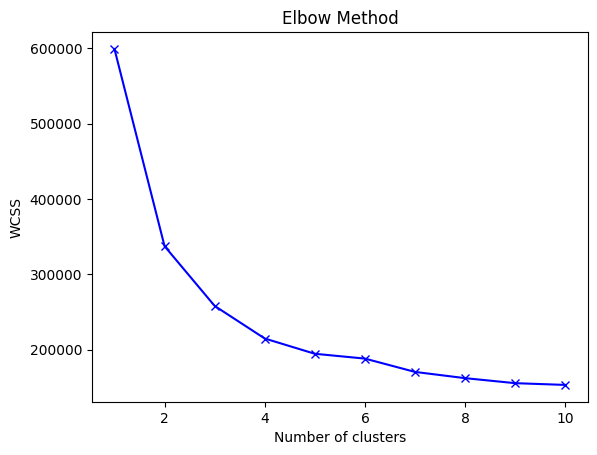

In [15]:
wcss = []
r = range(1,11)
for i in r:
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 100).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(r, wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 2.3.2 Silhouette score
* Run K-Means with different K values, starting from **k=2**
* Plot a graph which shows Silhouette scores as a function of K
* According to the Silhouette score, what should be the best K for this dataset?

Note that this time the graph shows a high value on k=2 and decreasing values onward. This is not helpful.

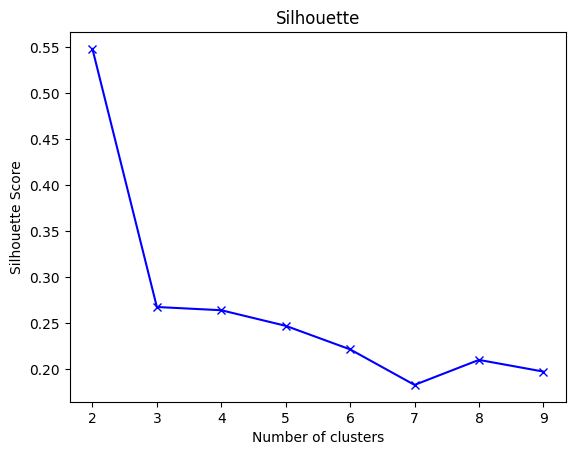

In [16]:
r = range(2,10)
sil_scores = []
for k in r:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2)
  y_kmeans = kmeans.fit_predict(X)

  sil_score = silhouette_score(X, y_kmeans, metric = 'euclidean')
  sil_scores.append(sil_score)

plt.plot(r, sil_scores, 'bx-')
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

##  3. Exploring the clusters
**For the rest of this exercise, use 4 clusters (*k=4*)**

### 3.1 cluster the data
* use KMeans to cluster the data. What are the clusters' sizes?

Note that one cluster is smaller than the rest.

In [17]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
pd.value_counts(y_kmeans)

<ipython-input-17-f4289dfd756b>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_kmeans)


,count
0,6036
2,5463
3,5143
1,2084


C

### 3.2 Use PCA to visualize clusters

* Use [Principal component analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the dimention of the data (X) to two dimentions (n_components=2). Denote the reduced projection of X as ***X_r***
* Run the visualization code below and review the output chart
* One of the clusters is indeed smaller than the rest,
* Note that two components explain ~70% of the variance

In [18]:
# Code to generate X_r:
pca = PCA(n_components=2, random_state = 42)
X_r = pca.fit(X).transform(X)
X_r

array([[ 7.22313505, -2.06485219],
       [ 8.29264033, -3.59811061],
       [ 8.92847093, -1.44078259],
       ...,
       [-2.58672741, -0.62482677],
       [-3.3814746 ,  0.5224368 ],
       [-2.06842466, -1.83855879]])

Explained variance ratio (first two components): [0.57071074 0.1467074 ]


<Figure size 640x480 with 0 Axes>

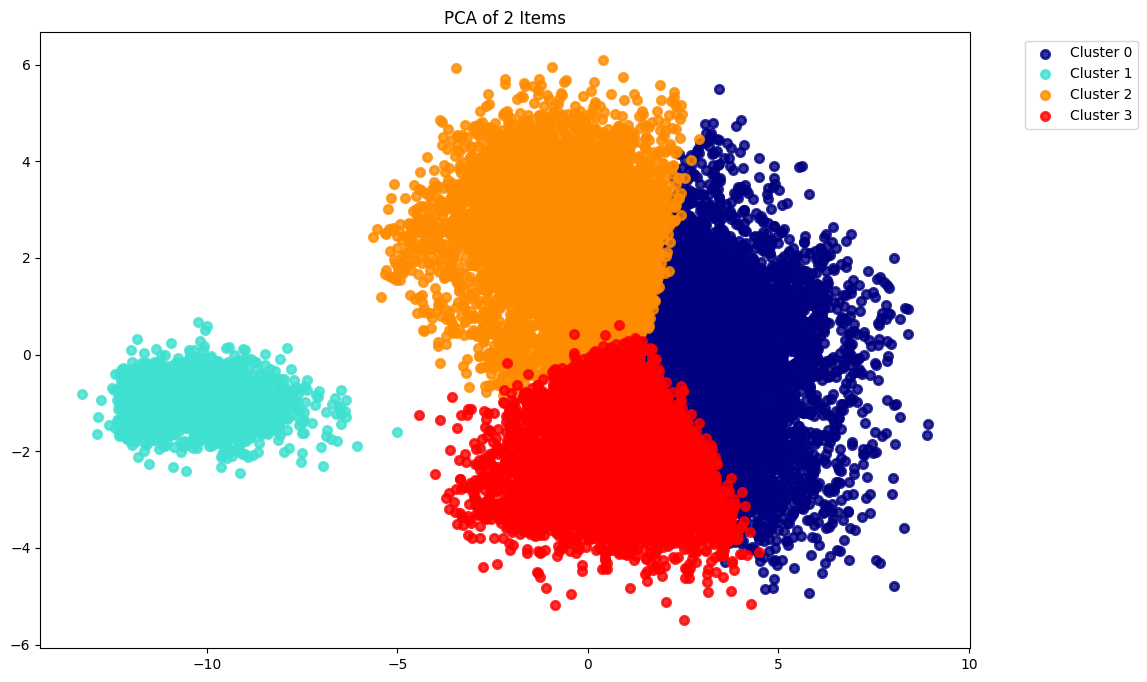

In [19]:
target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_kmeans == i, 0], X_r[y_kmeans == i, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Items')
plt.show()

## 3.3 Characterize clusters via players' positions

Positions taken from [guidetofootball.com](https://www.guidetofootball.com/tactics/playing-positions/):

![Positions](https://www.guidetofootball.com/wp-content/uploads/playing-positions.png)

The column 'positions' was not used in this analysis. The column holds the positions in which each player is playing at.


Can we tag each cluster with unique player position? are the players in each cluster tend to play at similar positions? Let's find out:
* create a copy of df_full and add it a column - the results of KMeans - cluster id (0-3) for each player. Name it *df_res*
* Use *df_res*: For each cluster, print most frequent positions for that cluster.

Note that players may have more than one position. For example, a player may have the value "CB,RB" in column 'positions'.

* What is the cluster id of Lionel Messi? Does the positions found above match Messi's position?


In [20]:
df_res = df_full.copy()
df_res['cluster'] = y_kmeans
df_res.head(5)

,player_id,version,name,full_name,description,image,height_cm,weight_kg,dob,positions,...,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,play_styles,cluster
0,239085,2024-07-08,Erling Haaland,Erling Braut Haaland,"Erling Haaland (Erling Braut Haaland, born 21 ...",https://cdn.sofifa.net/players/239/085/24_120.png,195,94,2000-07-21,ST,...,38,47,29,7,14,13,11,7.0,"Acrobatic +,Power Header,Quick Step",0
1,231747,2024-07-08,Kylian Mbappé,Kylian Mbappé Lottin,"Kylian Mbappé (Kylian Mbappé Lottin, born 20 D...",https://cdn.sofifa.net/players/231/747/24_120.png,182,75,1998-12-20,"ST,LW",...,26,34,32,13,5,7,11,6.0,"Quick Step +,Finesse Shot,Rapid,Flair,Trivela,...",0
2,192985,2024-07-08,Kevin De Bruyne,Kevin De Bruyne,Kevin De Bruyne (born 28 June 1991) is a Belgi...,https://cdn.sofifa.net/players/192/985/24_120.png,181,75,1991-06-28,"CM,CAM",...,66,70,53,15,13,5,10,13.0,"Incisive Pass +,Dead Ball,Pinged Pass,Long Bal...",0
3,231866,2024-07-08,Rodri,Rodrigo Hernández Cascante,Rodri (born 22 June 1996) is a Spanish footbal...,https://cdn.sofifa.net/players/231/866/24_120.png,191,82,1996-06-22,"CDM,CM",...,92,87,78,10,10,7,14,8.0,"Power Shot +,Long Ball Pass,Bruiser,Aerial,Lon...",0
4,202126,2024-07-08,Harry Kane,Harry Kane,Harry Kane (born 28 July 1993) is a British fo...,https://cdn.sofifa.net/players/202/126/24_120.png,188,85,1993-07-28,ST,...,46,46,38,8,10,11,14,11.0,"Incisive Pass +,Long Ball Pass,First Touch,Tri...",0


In [21]:
preferred_positions = df_res.groupby('cluster')['positions'].agg(lambda x: ','.join(x)).str.split(',').explode()
preferred_positions.groupby('cluster').apply(lambda x: x.value_counts().nlargest(3))


cluster     
0        CM     2834
         CDM    1905
         CAM    1126
1        GK     2084
2        CB     3376
         RB     1136
         LB     1006
3        ST     2561
         LM     1355
         RM     1354
Name: positions, dtype: int64

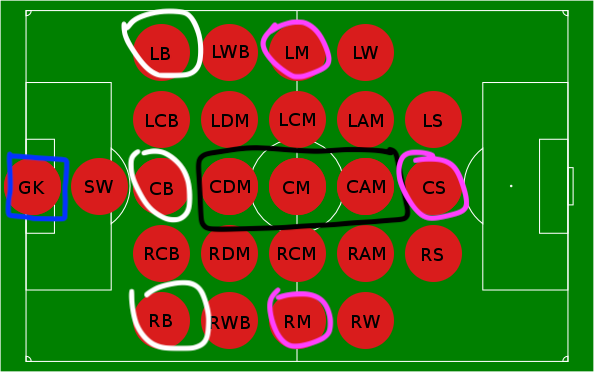

In [22]:
df_res.query("name=='Lionel Messi'")[['name','cluster']]

,name,cluster
7,Lionel Messi,0


## 3.4 Show top players per cluster
* Use the columns 'overall_rating' and 'description' and show 3 players with highest rating from each cluster
* **BONUS:** use the column 'image' to add an image of each player. Hint: create an <image> html tag from 'image' urls and convert the dataframe .to_html(). Wrap the result with display(HTML())

In [23]:
top_players_per_cluster = df_res.sort_values(by='overall_rating', ascending=False).groupby('cluster').head(3)[['cluster','image','name','description']]

top_players_per_cluster.set_index('cluster').sort_index()


top_players_per_cluster['image'] = top_players_per_cluster['image']\
    .str.replace(
        '(.*)',
        r'<img src="\1" style="max-height:124px;"></img>',
        regex=True
    )
#top_players_per_cluster
with pd.option_context('display.max_colwidth', 10000):
    display(HTML(top_players_per_cluster.to_html(escape=False)))

,cluster,image,name,description
0,0,,Erling Haaland,"Erling Haaland (Erling Braut Haaland, born 21 July 2000) is a Norwegian footballer who plays as a striker for British club Manchester City, and the Norway national team. In the game FC 24, his overall rating is 91."
2,0,,Kevin De Bruyne,"Kevin De Bruyne (born 28 June 1991) is a Belgian footballer who plays as a center midfield for British club Manchester City, and the Belgium national team. In the game FC 24, his overall rating is 91."
1,0,,Kylian Mbappé,"Kylian Mbappé (Kylian Mbappé Lottin, born 20 December 1998) is a French footballer who plays as a striker for French club Paris Saint Germain, and the France national team. In the game FC 24, his overall rating is 91."
5,1,,Thibaut Courtois,"Thibaut Courtois (Thibaut Nicolas Marc Courtois, born 11 May 1992) is a Belgian footballer who plays as a goalkeeper for Spanish club Real Madrid, and the Belgium national team. In the game FC 24, his overall rating is 90."
13,1,,Marc-André ter Stegen,"Marc-André ter Stegen (born 30 April 1992) is a German footballer who plays as a goalkeeper for Spanish club FC Barcelona, and the Germany national team. In the game FC 24, his overall rating is 89."
10,1,,Alisson,"Alisson (Alisson Ramsés Becker, born 2 October 1992) is a Brazilian footballer who plays as a goalkeeper for British club Liverpool. In the game FC 24, his overall rating is 89."
69,2,,Gabriel,"Gabriel (Gabriel dos Santos Magalhães, born 19 December 1997) is a Brazilian footballer who plays as a center back for British club Arsenal. In the game FC 24, his overall rating is 85."
126,2,,Chris Smalling,"Chris Smalling (born 22 November 1989) is a British footballer who plays as a center back for Italian club Roma. In the game FC 24, his overall rating is 84."
110,2,,Jonathan Tah,"Jonathan Tah (born 11 February 1996) is a German footballer who plays as a center back for German club Bayer 04 Leverkusen, and the Germany national team. In the game FC 24, his overall rating is 84."
768,3,,Albertinho Dutra,"Albertinho Dutra (born 29 February 1992) is a Brazilian footballer who plays as a left winger for Brazilian club São Paulo. In the game FC 24, his overall rating is 78."
